### IMPORT PACKAGES

In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [338]:
import sqlalchemy as sa
from sqlalchemy import create_engine
from sqlalchemy import Table, Column, Integer, String, MetaData

### CONNECT TO DATA SQLALCHEMY

In [339]:
Username = 'admin'
Password = 'amazing_people'
Host = 'alphacode-explore.ccwgqdqrrmvt.eu-west-1.rds.amazonaws.com'
Port = '1433'
Database = 'Michael'

In [340]:
connection = create_engine(
    'mssql+pymssql://' +
    Username + ':' + Password + '@' + Host + ':' + Port + '/' + Database
)

### SQL QUERY

In [341]:
sql_query = "Select * from claims_data"
sql_query = "Select * from test_set"

### CREATING A DATAFRAME

In [342]:
df_claims = pd.read_sql_query(sql_query_claims, connection)
df_claims['bmi'] = pd.to_numeric(df_claims['bmi'])
df_claims['children'] = pd.to_numeric(df_claims['children'])
df_claims['steps'] = pd.to_numeric(df_claims['steps'])
df_claims['age'] = pd.to_numeric(df_claims['age'])
df_claims['claim_amount'] = pd.to_numeric(df_claims['claim_amount'])

In [343]:
df.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.90,3009,0,yes,southwest,yes,16884.9240
1,18,male,33.77,3008,1,no,southeast,yes,1725.5523
4,32,male,28.88,8010,0,no,northwest,yes,3866.8552
6,46,female,33.44,3002,1,no,southeast,yes,8240.5896
10,25,male,26.22,8006,0,no,northeast,yes,2721.3208


### POLICY HOLDERS WHO CLAIMED ONLY

In [344]:
df = df[df['insurance_claim'] == 'yes']
df.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.90,3009,0,yes,southwest,yes,16884.9240
1,18,male,33.77,3008,1,no,southeast,yes,1725.5523
4,32,male,28.88,8010,0,no,northwest,yes,3866.8552
6,46,female,33.44,3002,1,no,southeast,yes,8240.5896
10,25,male,26.22,8006,0,no,northeast,yes,2721.3208


### PRE-PROCESSING

In [345]:
# Lables
y = df['claim_amount']

# Features
X = df.drop(['claim_amount', 'insurance_claim'], axis=1)

In [346]:
# Transform data
X_transformed = pd.get_dummies(X, drop_first=True)

In [347]:
# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)
X_standardize = pd.DataFrame(X_scaled,columns=X_transformed.columns)

In [348]:
from sklearn.model_selection import train_test_split

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y, test_size=0.2, random_state=47)

### TRAINING

In [350]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [351]:
knn = KNeighborsRegressor()
lm = LinearRegression()
tree = DecisionTreeRegressor(random_state=47)
forest = RandomForestRegressor(n_estimators=100, random_state=47)
svm = SVR(kernel='linear', C=500, gamma=47)

In [352]:
knn.fit(X_train, y_train)
lm.fit(X_train,y_train)
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVR(C=500, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=47,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### INTERCEPT ON LinearRegression

In [353]:
lm.intercept_

16475.56829692909

### Coefficients

In [354]:
coeff_df = pd.DataFrame(lm.coef_,X_transformed.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,3744.210813
bmi,3565.289360
steps,792.604848
children,969.935929
sex_male,-25.278476
smoker_yes,12189.818671
region_northwest,33.868928
region_southeast,-476.691160
region_southwest,-180.974148


In [310]:
from sklearn import metrics

RMSE

In [355]:
# Get predictions for training data
fit_lm = lm.predict(X_train)

# Print MSE for models
print('RMSE (train)')
print('Linear:', metrics.mean_squared_error(y_train, fit_lm) ** 0.5)

RMSE (train)
Linear: 6129.526584640858


### PREDICTING

In [356]:
pred_knn = knn.predict(X_test)
predictions = lm.predict(X_test)
pred_tree = tree.predict(X_test)
pred_forest = forest.predict(X_test)
pred_svm = svm.predict(X_test)

### TESTING

In [357]:
from sklearn.metrics import mean_squared_error

KNN

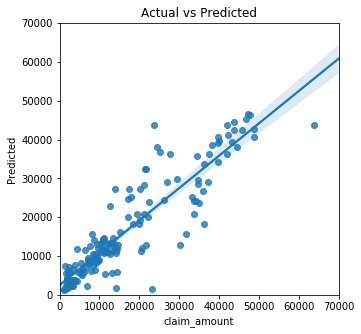

In [358]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=pred_knn)

LINEAR

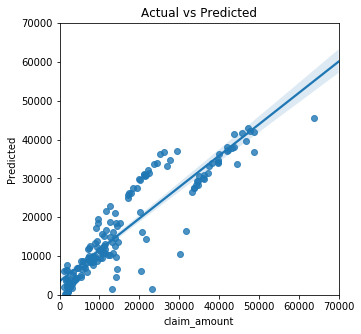

In [359]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=predictions)

DECISION TREE

In [360]:
from sklearn.metrics import mean_squared_error

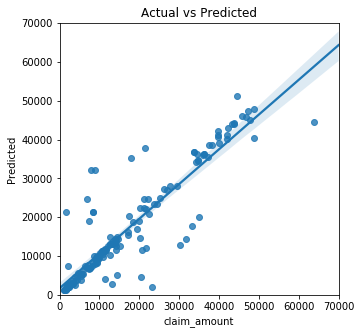

In [317]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=pred_tree)

RANDOM FOREST

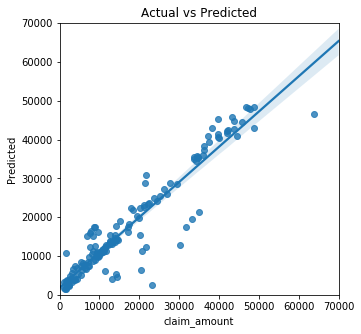

In [361]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=pred_forest)

SVM

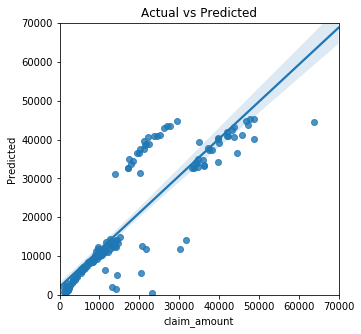

In [362]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=pred_svm)

In [363]:
print('RMSE:', mean_squared_error(y_test, pred_knn) ** 0.5)
print('RMSE:', metrics.mean_squared_error(y_test, predictions) ** 0.5)
print('RMSE:', mean_squared_error(y_test, pred_tree) ** 0.5)
print('RMSE:', mean_squared_error(y_test, pred_forest) ** 0.5)
print('RMSE:', mean_squared_error(y_test, pred_svm) ** 0.5)

RMSE: 5938.149929383489
RMSE: 6111.2832738978195
RMSE: 6056.490485266752
RMSE: 4621.029380048193
RMSE: 7529.111631044374


### RANDOM FOREST HAS THE LOWEST RMSE

TUNING RANDOM FOREST MODEL

### Train

In [364]:
# 5 trees in forest
forest_1 = RandomForestRegressor(n_estimators=5, random_state=47)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, random_state=47)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, random_state=47)

In [365]:
forest_1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=47, verbose=0,
                      warm_start=False)

In [366]:
forest_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=47, verbose=0,
                      warm_start=False)

In [367]:
forest_3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=47, verbose=0,
                      warm_start=False)

### Predict

In [368]:
pred_forest_1 = forest_1.predict(X_test)
pred_forest_2 = forest_2.predict(X_test)
pred_forest_3 = forest_3.predict(X_test)

### Test

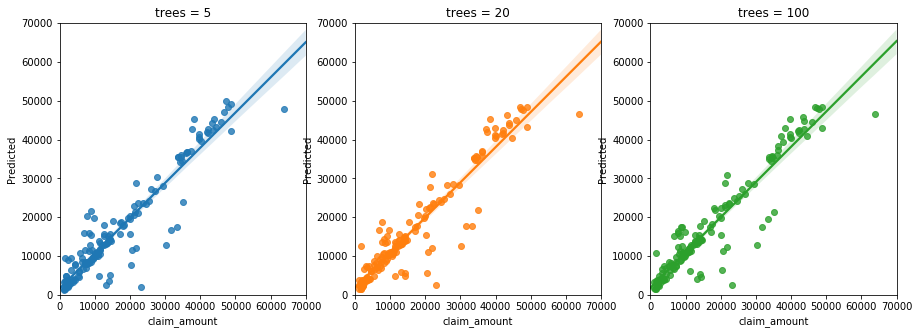

In [369]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_forest_1, pred_forest_2, pred_forest_3]
title = ['trees = 5', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i]) 

RMSE

In [370]:
print('RMSE:')
print('trees=5:', mean_squared_error(y_test, pred_forest_1) ** 0.5)
print('trees=20:', mean_squared_error(y_test, pred_forest_2) ** 0.5)
print('trees=100:', mean_squared_error(y_test, pred_forest_3) ** 0.5)

RMSE:
trees=5: 4735.857329619374
trees=20: 4678.020773028189
trees=100: 4621.029380048193


THE FOREST WITH 100 TREES PERFORMED BEST

In [371]:
sql_query_claims = "Select * from claims_data"
sql_query_test = "Select * from test_set"

df_claims = pd.read_sql_query(sql_query_claims, connection)
df = df[df['insurance_claim'] == 'yes']
df_claims['bmi'] = pd.to_numeric(df_claims['bmi'])
df_claims['children'] = pd.to_numeric(df_claims['children'])
df_claims['steps'] = pd.to_numeric(df_claims['steps'])
df_claims['age'] = pd.to_numeric(df_claims['age'])
df_claims['claim_amount'] = pd.to_numeric(df_claims['claim_amount'])

df_test = pd.read_sql_query(sql_query_test, connection)

df_claims_no_labels = df_claims.drop(['insurance_claim', 'claim_amount'], axis=1)
df_test_no_index = df_test.drop(['row_id'], axis=1)

df_combined = pd.concat([df_claims_no_labels, df_test_no_index],sort=False).reset_index(drop=True)

TRANSFORM FEATURES

In [372]:
combined_transformed = pd.get_dummies(df_combined, drop_first=True)

X_transformed = combined_transformed.iloc[:len(y), :]
test_transformed = combined_transformed.iloc[len(y):, :]

### TRAIN/SPLIT TEST

In [373]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=47)

TRAINING

In [374]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=47)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=47, verbose=0,
                      warm_start=False)

### TESTING PREDICTION

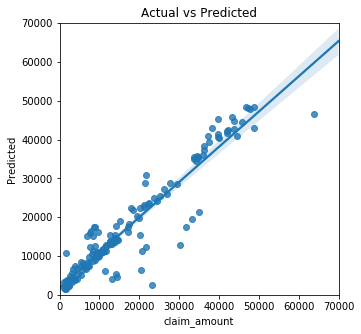

In [375]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=pred_forest)

In [376]:
from sklearn import metrics

print('Random Forest RMSE:', metrics.mean_squared_error(y_test, pred_forest) ** 0.5)

Random Forest RMSE: 4621.029380048193


### IMRPOVING MODEL

In [377]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

X_standardize = pd.DataFrame(X_scaled,columns=X_transformed.columns)
X_standardize.head()

,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,...,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,3.957218,-0.144432,-0.148974,-0.129935,-0.119368,-0.144432,-0.124757,-0.134928,-0.157699,-0.144432,...,0.0,0.0,0.0,0.0,0.0,0.0,2.020994,-0.548329,-0.627087,1.779015
1,-0.252703,-0.144432,-0.148974,-0.129935,-0.119368,-0.144432,-0.124757,-0.134928,-0.157699,-0.144432,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.494806,-0.548329,1.594674,-0.562109
2,-0.252703,-0.144432,-0.148974,-0.129935,-0.119368,-0.144432,-0.124757,-0.134928,-0.157699,6.923691,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.494806,-0.548329,1.594674,-0.562109
3,-0.252703,-0.144432,-0.148974,-0.129935,-0.119368,-0.144432,-0.124757,-0.134928,-0.157699,-0.144432,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.494806,1.823723,-0.627087,-0.562109
4,-0.252703,-0.144432,-0.148974,-0.129935,-0.119368,-0.144432,-0.124757,-0.134928,-0.157699,-0.144432,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.494806,1.823723,-0.627087,-0.562109


In [378]:
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y, test_size=0.2, random_state=47)

In [379]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lm = LinearRegression()
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=100)

lm.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

pd.DataFrame(np.array([lm.intercept_, ridge.intercept_, lasso.intercept_]),
             columns=['Intercept'], 
             index=['Linear', 'Ridge', 'Lasso'])

,Intercept
Linear,-2.536989e+16
Ridge,1.591621e+04
Lasso,1.589253e+04


### TUNING


Tuned Random Forest RMSE:
trees=5: 17520.324109349516
trees=20: 16803.80127197646
trees=100: 16505.967566129628


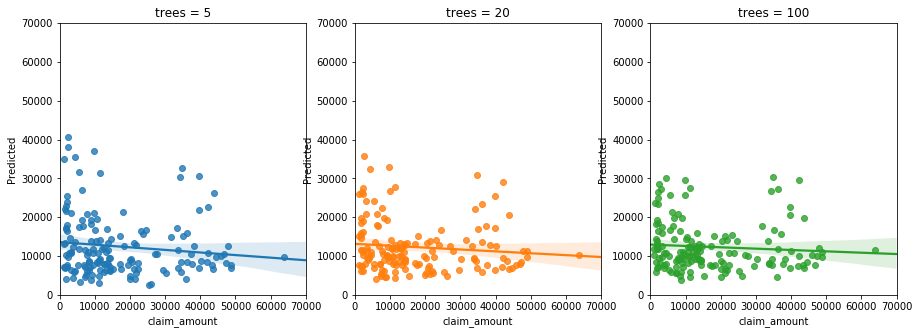

In [381]:
# 5 trees in forest
forest_1 = RandomForestRegressor(n_estimators=5, random_state=47)
# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, random_state=47)
# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, random_state=47)

forest_1.fit(X_train, y_train)
forest_2.fit(X_train, y_train)
forest_3.fit(X_train, y_train)

pred_forest_1 = forest_1.predict(X_test)
pred_forest_2 = forest_2.predict(X_test)
pred_forest_3 = forest_3.predict(X_test)

# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)
    
# Create list of titles and predictions to use in for loop
pred = [pred_forest_1, pred_forest_2, pred_forest_3]
title = ['trees = 5', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i])
    
print('')
print('Tuned Random Forest RMSE:')
print('trees=5:', metrics.mean_squared_error(y_test, pred_forest_1) ** 0.5)
print('trees=20:', metrics.mean_squared_error(y_test, pred_forest_2) ** 0.5)
print('trees=100:', metrics.mean_squared_error(y_test, pred_forest_3) ** 0.5)    

In [382]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=47)
forest.fit(X_train, y_train)

test_pred_forest = forest.predict(test_transformed)

test_pred_forest

array([9252.9346841, 5405.5746365, 7304.3332685, 5210.0482843,
       4022.0479673, 5210.0482843, 4653.181933 , 4653.181933 ,
       7304.3332685, 5210.0482843, 3763.2638425, 4093.785407 ,
       4827.6321213, 5017.8046415, 6316.789524 , 7304.3332685,
       4499.8025603, 5405.5746365, 4653.181933 , 8372.406901 ,
       3763.2638425, 4653.181933 , 4022.0479673, 5420.9260196,
       4022.0479673, 4653.181933 , 6316.789524 , 7304.3332685,
       4022.0479673, 5017.8046415, 5084.374067 , 5017.8046415,
       4653.181933 , 4022.0479673, 7304.3332685, 5276.759509 ,
       4827.6321213, 8372.406901 , 4022.0479673, 4653.181933 ,
       5017.8046415, 4022.0479673, 5084.374067 , 4646.820609 ,
       5276.759509 , 4499.8025603, 5420.9260196, 7304.3332685,
       4022.0479673, 4093.785407 , 4022.0479673, 5420.9260196,
       5017.8046415, 7304.3332685, 5210.0482843, 5084.374067 ,
       4022.0479673, 7304.3332685, 5210.0482843, 4646.820609 ,
       3763.2638425, 5210.0482843, 3763.2638425, 8372.4

In [389]:
submission = pd.DataFrame({'row_id':range(0, len(test_pred_forest)),'prediction': test_pred_forest})
submission

,row_id,prediction
0,0,9252.934684
1,1,5405.574637
2,2,7304.333269
3,3,5210.048284
4,4,4022.047967
5,5,5210.048284
6,6,4653.181933
7,7,4653.181933
8,8,7304.333269
9,9,5210.048284


In [390]:
submission.to_sql('regression_model_results', con=connection, if_exists='append', index=True,method='multi',chunksize=500)

In [392]:
connection.table_names()

['claims_data',
 'classification_model_results',
 'football_players',
 'regression_model_results',
 'sysdiagrams',
 'test_set',
 'test_set2']